In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Reading csv file

In [3]:
df= pd.read_csv("forecasts_custom_prophet1.csv")

In [4]:
df.head(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,04-06-2020 00:00,New South Wales,Australia,4019,51,3321
1,05-06-2020 00:00,New South Wales,Australia,4082,51,3465
2,06-06-2020 00:00,New South Wales,Australia,4075,52,3494
3,07-06-2020 00:00,New South Wales,Australia,4085,53,3493
4,08-06-2020 00:00,New South Wales,Australia,4121,53,3480
5,09-06-2020 00:00,New South Wales,Australia,4107,53,3457
6,10-06-2020 00:00,New South Wales,Australia,4112,53,3494
7,04-06-2020 00:00,Victoria,Australia,1995,24,1829
8,05-06-2020 00:00,Victoria,Australia,2011,24,1888
9,06-06-2020 00:00,Victoria,Australia,2021,24,1826


In [5]:
df.shape

(4389, 6)

In [6]:
## Printing column names

In [7]:
df.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
#EDA

In [8]:
## Checking null values

print((df.isnull().sum()/df.shape[0])*100)

ObservationDate    0.0
Province/State     0.0
Country/Region     0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
dtype: float64


In [9]:
df.dtypes

ObservationDate    object
Province/State     object
Country/Region     object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [10]:

list1 = ['ObservationDate','Province/State','Country/Region','Confirmed','Deaths','Recovered']

In [11]:
for i in list1:
    print("Column name :-",i,"\n")
    print(df[i].value_counts().head(1)/df.shape[0]*100)
    print("******************************************************")

Column name :- ObservationDate 

0    46.138072
Name: ObservationDate, dtype: float64
******************************************************
Column name :- Province/State 

0    46.138072
Name: Province/State, dtype: float64
******************************************************
Column name :- Country/Region 

0    46.138072
Name: Country/Region, dtype: float64
******************************************************
Column name :- Confirmed 

0    47.391205
Name: Confirmed, dtype: float64
******************************************************
Column name :- Deaths 

0    68.215995
Name: Deaths, dtype: float64
******************************************************
Column name :- Recovered 

0    73.274094
Name: Recovered, dtype: float64
******************************************************


In [12]:
df1 = df

In [13]:
for i in list1:
    df1.drop(df1.index[df1[i] == '0'], inplace=True)

In [14]:
df1.shape

(2364, 6)

In [15]:
df1.tail(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
4337,08-06-2020 00:00,Sevastopol*,Ukraine,5249,3,1142
4350,07-06-2020 00:00,Ternopil Oblast,Ukraine,40536,26,31015
4351,08-06-2020 00:00,Ternopil Oblast,Ukraine,26215,26,3816
4352,09-06-2020 00:00,Ternopil Oblast,Ukraine,18722,26,14928
4353,10-06-2020 00:00,Ternopil Oblast,Ukraine,12739,26,6329
4354,04-06-2020 00:00,Vinnytsia Oblast,Ukraine,571,16,427
4362,05-06-2020 00:00,Volyn Oblast,Ukraine,29283,477,476
4373,09-06-2020 00:00,Zakarpattia Oblast,Ukraine,9376,28,1758
4374,10-06-2020 00:00,Zakarpattia Oblast,Ukraine,9084,28,1641
4379,08-06-2020 00:00,Zaporizhia Oblast,Ukraine,11637,13,2339


In [16]:
df1.describe()

,Confirmed,Deaths,Recovered
count,2.364000e+03,2364.000000,2.364000e+03
mean,2.363147e+04,1209.284687,2.546793e+04
std,1.368274e+05,10152.904756,2.224601e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,6.000000e+00,0.000000,0.000000e+00
50%,1.940000e+02,3.000000,0.000000e+00
75%,7.986750e+03,143.250000,4.400000e+02
max,3.242818e+06,382980.000000,4.657437e+06


In [17]:
list2 = ['Confirmed','Deaths','Recovered']

for i in list2:
    
    print("Column name :- ",i)
    print(df1[i].value_counts())
    print("*********")

Column name :-  Confirmed
1        389
2         63
0         55
6         36
3         30
        ... 
797        1
3869       1
50340      1
45441      1
11637      1
Name: Confirmed, Length: 1226, dtype: int64
*********
Column name :-  Deaths
0        969
1        138
3         72
2         56
6         45
        ... 
24124      1
3369       1
1453       1
501        1
388        1
Name: Deaths, Length: 632, dtype: int64
*********
Column name :-  Recovered
0       1191
1         45
16        22
4         21
17        15
        ... 
4454       1
1093       1
684        1
229        1
2339       1
Name: Recovered, Length: 765, dtype: int64
*********


In [18]:
df1.shape

(2364, 6)

In [19]:
## Removing timestamp from date column

df1['ObservationDate'] = df1['ObservationDate'].apply(lambda row : row.replace(" 00:00",""))

In [20]:
df1

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,04-06-2020,New South Wales,Australia,4019,51,3321
1,05-06-2020,New South Wales,Australia,4082,51,3465
2,06-06-2020,New South Wales,Australia,4075,52,3494
3,07-06-2020,New South Wales,Australia,4085,53,3493
4,08-06-2020,New South Wales,Australia,4121,53,3480
...,...,...,...,...,...,...
4354,04-06-2020,Vinnytsia Oblast,Ukraine,571,16,427
4362,05-06-2020,Volyn Oblast,Ukraine,29283,477,476
4373,09-06-2020,Zakarpattia Oblast,Ukraine,9376,28,1758
4374,10-06-2020,Zakarpattia Oblast,Ukraine,9084,28,1641


In [21]:
## Extracting month from date column
df1['Month']=pd.to_datetime(df1['ObservationDate']).dt.month
df1.head(10)

C:\Users\Rohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Rohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Rohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Rohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-03-2020' in DD/MM/YYYY format. Provide format or specif

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Month
0,04-06-2020,New South Wales,Australia,4019,51,3321,4
1,05-06-2020,New South Wales,Australia,4082,51,3465,5
2,06-06-2020,New South Wales,Australia,4075,52,3494,6
3,07-06-2020,New South Wales,Australia,4085,53,3493,7
4,08-06-2020,New South Wales,Australia,4121,53,3480,8
5,09-06-2020,New South Wales,Australia,4107,53,3457,9
6,10-06-2020,New South Wales,Australia,4112,53,3494,10
7,04-06-2020,Victoria,Australia,1995,24,1829,4
8,05-06-2020,Victoria,Australia,2011,24,1888,5
9,06-06-2020,Victoria,Australia,2021,24,1826,6


In [22]:
df1.head(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Month
0,04-06-2020,New South Wales,Australia,4019,51,3321,4
1,05-06-2020,New South Wales,Australia,4082,51,3465,5
2,06-06-2020,New South Wales,Australia,4075,52,3494,6
3,07-06-2020,New South Wales,Australia,4085,53,3493,7
4,08-06-2020,New South Wales,Australia,4121,53,3480,8
5,09-06-2020,New South Wales,Australia,4107,53,3457,9
6,10-06-2020,New South Wales,Australia,4112,53,3494,10
7,04-06-2020,Victoria,Australia,1995,24,1829,4
8,05-06-2020,Victoria,Australia,2011,24,1888,5
9,06-06-2020,Victoria,Australia,2021,24,1826,6


In [23]:
df1

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Month
0,04-06-2020,New South Wales,Australia,4019,51,3321,4
1,05-06-2020,New South Wales,Australia,4082,51,3465,5
2,06-06-2020,New South Wales,Australia,4075,52,3494,6
3,07-06-2020,New South Wales,Australia,4085,53,3493,7
4,08-06-2020,New South Wales,Australia,4121,53,3480,8
...,...,...,...,...,...,...,...
4354,04-06-2020,Vinnytsia Oblast,Ukraine,571,16,427,4
4362,05-06-2020,Volyn Oblast,Ukraine,29283,477,476,5
4373,09-06-2020,Zakarpattia Oblast,Ukraine,9376,28,1758,9
4374,10-06-2020,Zakarpattia Oblast,Ukraine,9084,28,1641,10


In [24]:
# Grouping values on the basis of month

con_grouped_month = df1.groupby('Month').Confirmed.sum()

death_grouped_month = df1.groupby('Month').Deaths.sum()

rec_grouped_month = df1.groupby('Month').Recovered.sum()

In [25]:
con_grouped_month


Month
1            0
2            4
3      1674436
4      4092307
5      7321576
6     10790779
7      7626102
8      4993276
9      9939752
10     9423317
11        1411
12        1846
Name: Confirmed, dtype: int64

In [26]:
death_grouped_month

Month
1          0
2          0
3      37500
4     272838
5     557251
6     842934
7     363693
8     234375
9     302503
10    247593
11        24
12        38
Name: Deaths, dtype: int64

In [27]:
rec_grouped_month

Month
1            0
2            0
3        20921
4      8707563
5     15023953
6     14081119
7      7311027
8      2028443
9      6149225
10     6883878
11          28
12          31
Name: Recovered, dtype: int64

In [28]:
## Visualization

Text(0.5, 1.0, 'Mothly cases')

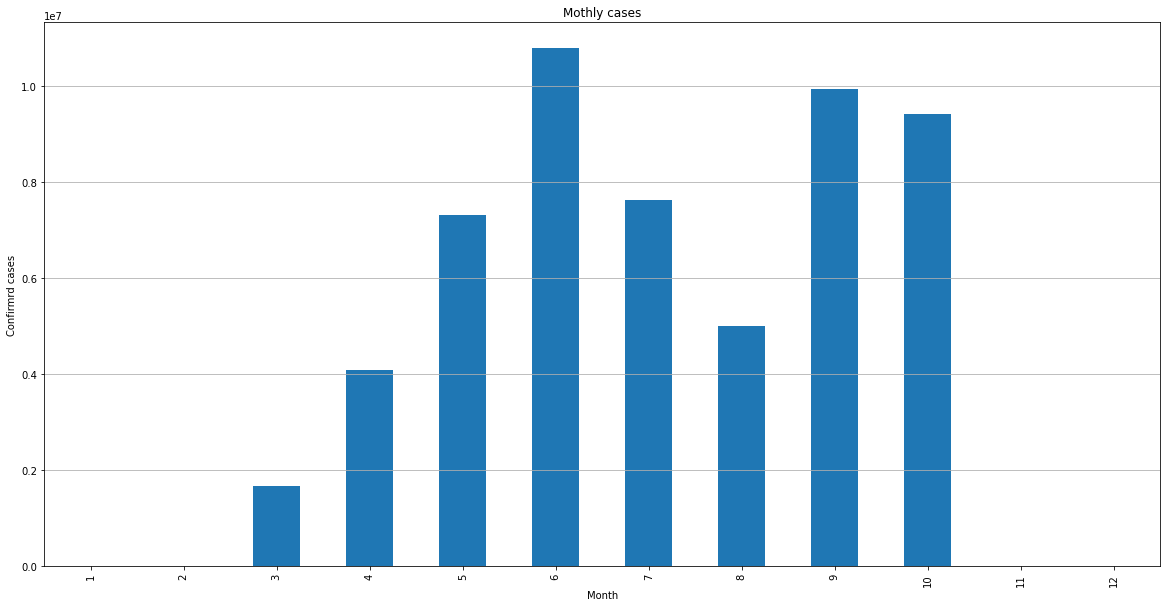

In [29]:
# plotting bar graph for all three categories

con_grouped_month.plot(kind='bar',figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Confirmrd cases")
plt.grid(axis='y')
plt.title("Mothly cases")


### Confirmed cases started to find from 3rd month of 2020, since then case kept rising.
### In year 2020, highest number of confirmed case found in 6th month: then cases started to decline but in 9th month there was 
### sudden rise in cases.

Text(0.5, 1.0, 'Monthly Death')

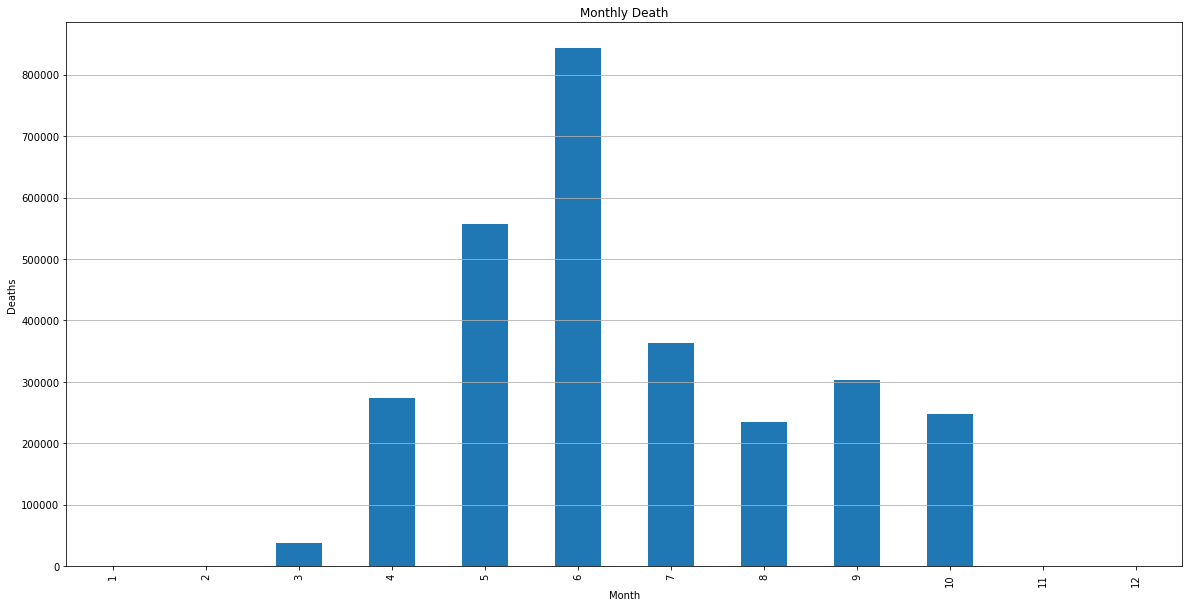

In [46]:
death_grouped_month.plot(kind='bar',figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Deaths")
plt.grid(axis='y')
plt.title("Monthly Death")

Text(0.5, 1.0, 'Recovery cases')

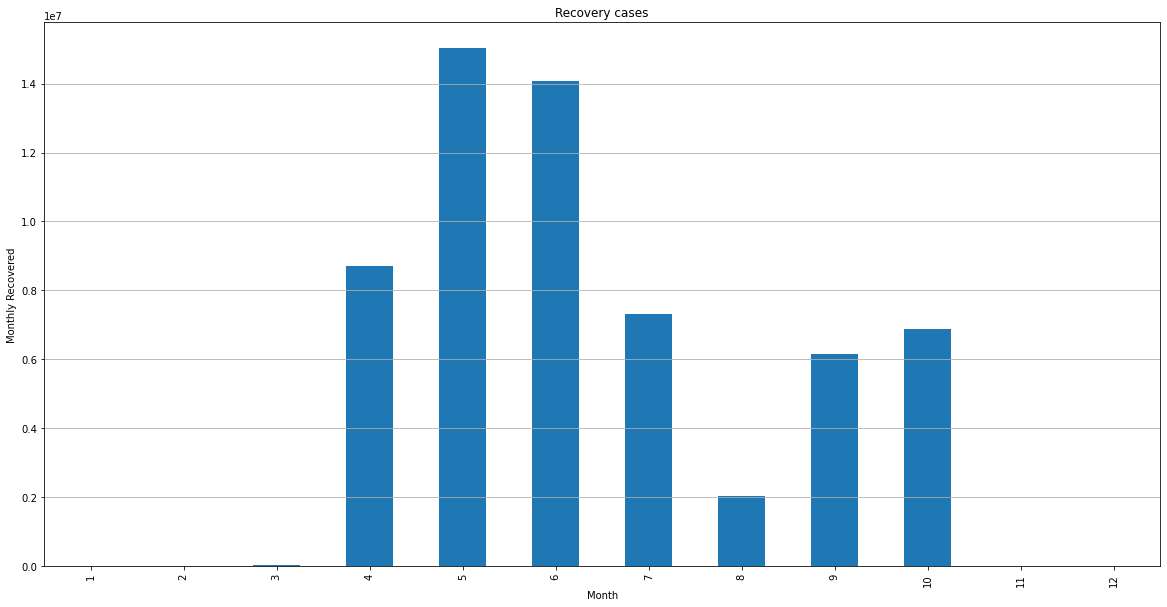

In [47]:
rec_grouped_month.plot(kind='bar',figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Monthly Recovered")
plt.grid(axis='y')
plt.title("Recovery cases")

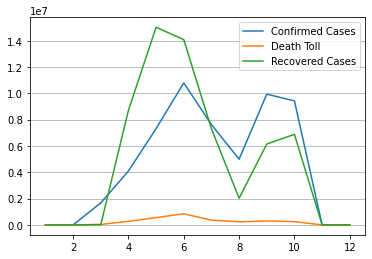

In [32]:
fig, ax = plt.subplots()

ax.plot(con_grouped_month,label = 'Confirmed Cases')
ax.plot(death_grouped_month,label = 'Death Toll' )
ax.plot(rec_grouped_month, label = 'Recovered Cases')
plt.grid(axis='y')
plt.legend()
plt.show()

In [33]:
### 

In [34]:
print(df1['Country/Region'].nunique())
print(df['Country/Region'].unique())

21
['Australia' 'Brazil' 'Canada' 'Chile' 'Colombia' 'Denmark' 'France'
 'Germany' 'Hong Kong' 'Italy' 'Japan' 'Macau' 'Mainland China' 'Mexico'
 'Netherlands' 'Peru' 'Russia' 'Spain' 'UK' 'US' 'Ukraine']


In [35]:
con_grouped_country = df1.groupby('Country/Region').Confirmed.sum()

death_grouped_country = df1.groupby('Country/Region').Deaths.sum()

rec_grouped_country = df1.groupby('Country/Region').Recovered.sum()

Text(0.5, 1.0, 'Confirmed County wise cases')

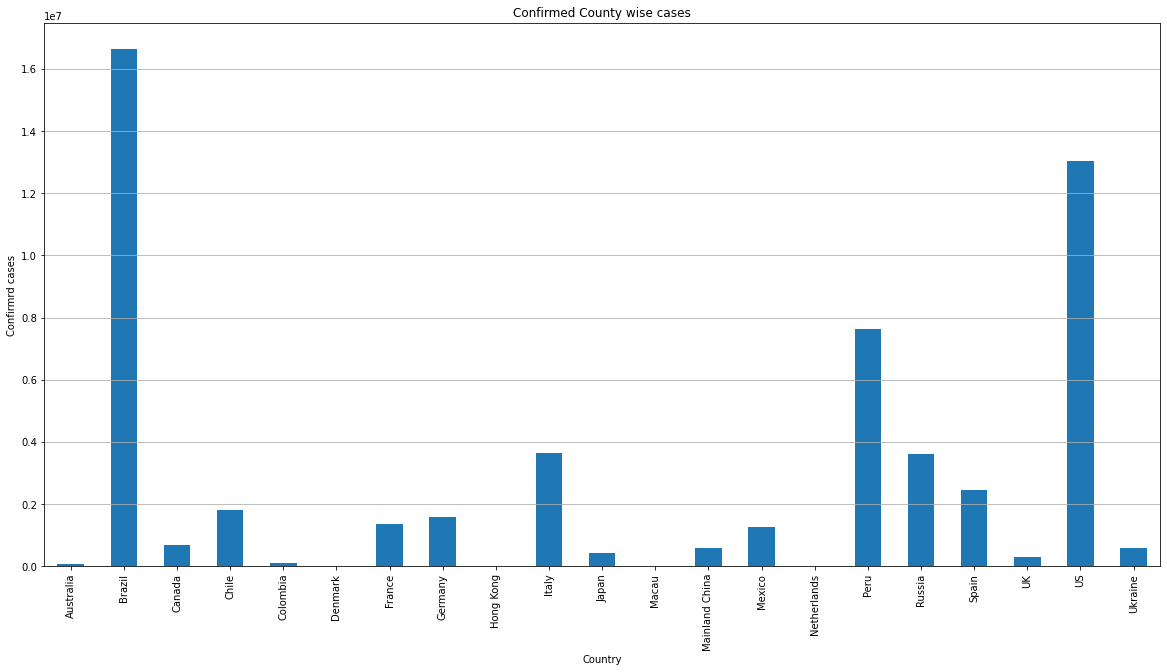

In [50]:
con_grouped_country.plot(kind='bar',figsize=(20,10))
plt.xlabel("Country")
plt.ylabel("Confirmrd cases")
plt.grid(axis='y')
plt.title("Confirmed County wise cases")


Text(0.5, 1.0, 'Death cases')

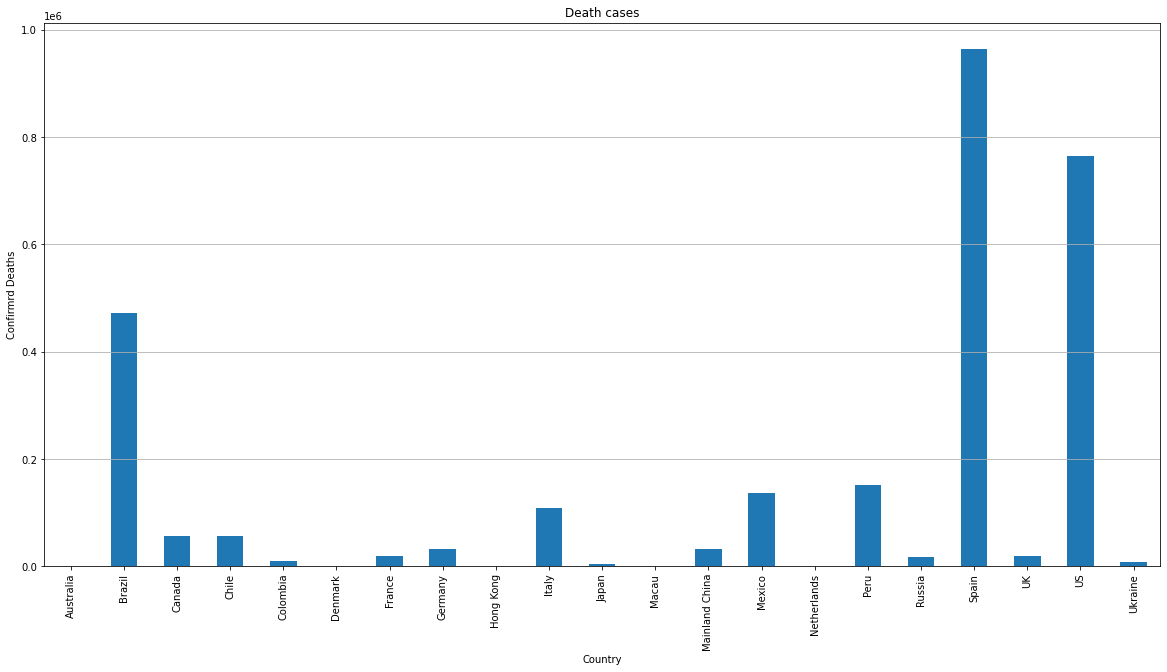

In [37]:
death_grouped_country.plot(kind='bar',figsize=(20,10))
plt.xlabel("Country")
plt.ylabel("Confirmrd Deaths")
plt.grid(axis='y')
plt.title("Death cases")


Text(0.5, 1.0, 'Recovery cases')

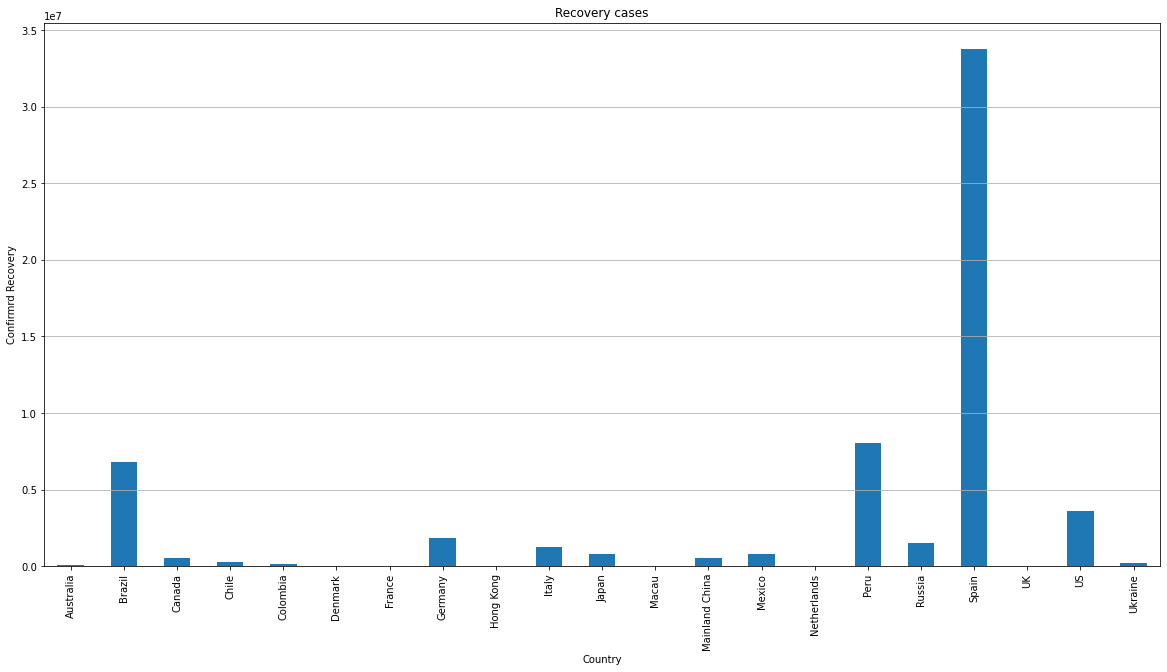

In [38]:
rec_grouped_country.plot(kind='bar',figsize=(20,10))
plt.xlabel("Country")
plt.ylabel("Confirmrd Recovery")
plt.grid(axis='y')
plt.title("Recovery cases")


In [39]:
# Top 4 Countries provience wise visulization

In [40]:
US = df1[df1['Country/Region']=='US']

In [41]:
US

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Month
2947,04-06-2020,Washington,US,22773,1151,0,4
2948,05-06-2020,Washington,US,23099,1165,0,5
2949,06-06-2020,Washington,US,23485,1181,0,6
2950,07-06-2020,Washington,US,23809,1187,0,7
2951,08-06-2020,Washington,US,24032,1195,0,8
...,...,...,...,...,...,...,...
4195,06-06-2020,Recovered,US,0,0,503670,6
4196,07-06-2020,Recovered,US,0,0,512724,7
4197,08-06-2020,Recovered,US,0,0,523070,8
4198,09-06-2020,Recovered,US,0,0,531153,9


In [42]:
Brazil = df1[df1['Country/Region']=='Brazil']

Peru = df1[df1['Country/Region']=='Peru']

Spain = df1[df1['Country/Region']=='Spain']

In [43]:
## For US

In [44]:
con_grouped_US = US.groupby('Province/State').Confirmed.sum()

death_grouped_US = US.groupby('Province/State').Deaths.sum()

rec_grouped_US = US.groupby('Province/State').Recovered.sum()

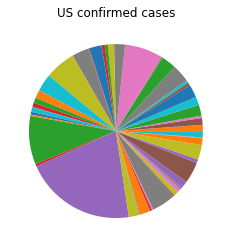

In [51]:
plt.title("US confirmed cases")
plt.pie(con_grouped_US)
plt.show() 

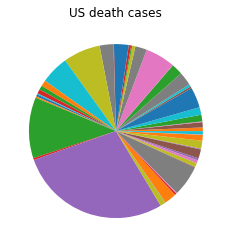

In [52]:
plt.title("US death cases")
plt.pie(death_grouped_US)
plt.show() 

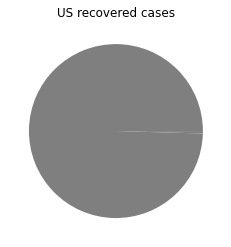

In [53]:

plt.title("US recovered cases")
plt.pie(rec_grouped_US)
plt.show() 

In [ ]:
#for USA

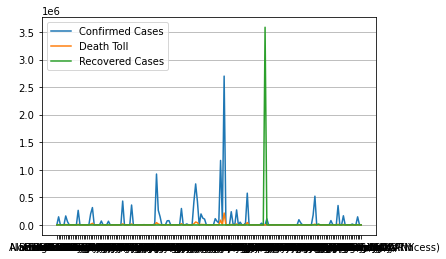

In [54]:
fig, ax = plt.subplots()

ax.plot(con_grouped_US,label = 'Confirmed Cases')
ax.plot(death_grouped_US,label = 'Death Toll' )
ax.plot(rec_grouped_US, label = 'Recovered Cases')
plt.grid(axis='y')
plt.legend()
plt.show()

In [ ]:
# For Brazil

In [55]:
con_grouped_Brazil = Brazil.groupby('Province/State').Confirmed.sum()

death_grouped_Brazil = Brazil.groupby('Province/State').Deaths.sum()

rec_grouped_Brazil = Brazil.groupby('Province/State').Recovered.sum()


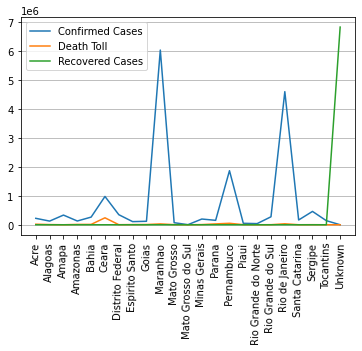

In [56]:
fig, ax = plt.subplots()

ax.plot(con_grouped_Brazil,label = 'Confirmed Cases')
ax.plot(death_grouped_Brazil,label = 'Death Toll' )
ax.plot(rec_grouped_Brazil, label = 'Recovered Cases')
plt.grid(axis='y')
plt.xticks(rotation=89)
plt.legend()
plt.show()


In [ ]:
# For Peru

In [57]:
con_grouped_Peru = Peru.groupby('Province/State').Confirmed.sum()

death_grouped_Peru = Peru.groupby('Province/State').Deaths.sum()

rec_grouped_Peru = Peru.groupby('Province/State').Recovered.sum()


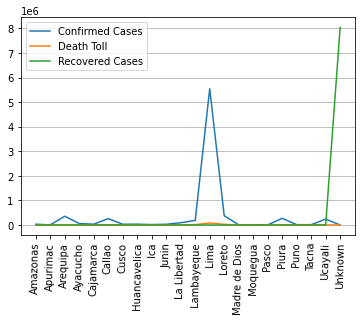

In [58]:
fig, ax = plt.subplots()

ax.plot(con_grouped_Peru,label = 'Confirmed Cases')
ax.plot(death_grouped_Peru,label = 'Death Toll' )
ax.plot(rec_grouped_Peru, label = 'Recovered Cases')
plt.grid(axis='y')
plt.xticks(rotation=89)
plt.legend()
plt.show()


In [ ]:
# For Spain

In [59]:
con_grouped_Spain = Spain.groupby('Province/State').Confirmed.sum()

death_grouped_Spain = Spain.groupby('Province/State').Deaths.sum()

rec_grouped_Spain = Spain.groupby('Province/State').Recovered.sum()


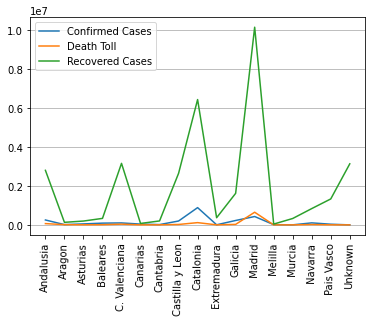

In [60]:
fig, ax = plt.subplots()

ax.plot(con_grouped_Spain,label = 'Confirmed Cases')
ax.plot(death_grouped_Spain,label = 'Death Toll' )
ax.plot(rec_grouped_Spain, label = 'Recovered Cases')
plt.grid(axis='y')
plt.xticks(rotation=89)
plt.legend()
plt.show()


Conclusion – 
1.	Spain has highest number of recovered cases.
2.	Brazil and Us has highest number of confirmed cases.
3.	Spain and Us has highest number of deaths.
4.	Confirmed cases started to find from 3rd month of 2020, since then case kept rising.
5.	In year 2020, highest number of confirmed cases found in 6th month: then cases started to decline but in 9th month there was sudden rise in cases.
6.	After 10th month there is sudden fall started in case according to data
7.	For deaths from 3rd months started peoples dying. In 6th month more than 800000 peoples are died and this is peak. After 6th month graph felled down.
8.	On the graph observation saw that majority people recovered in 5th and 6th month 2020 
